### 1. Clean raw answers

In [34]:
# List of CSV files representing different tasks
csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv',
    './shading_results.csv'
]

In [39]:
import pandas as pd
import numpy as np
import os
import re

def clean_raw_answers(file_path):
    """
    Clean raw answers from CSV file, focusing only on extracting digits.
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: DataFrame with raw and cleaned answers
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    def extract_digits(x):
        if pd.isna(x):
            return np.nan
            
        # Convert to string and clean
        x = str(x).strip().replace('\n', '')
        
        # If string starts with "user", extract the last number
        if x.startswith('user'):
            numbers = re.findall(r'\d+\.?\d*', x)
            return float(numbers[-1]) if numbers else np.nan
            
        # Extract the first number found otherwise
        numbers = re.findall(r'\d+\.?\d*', x)
        return float(numbers[0]) if numbers else np.nan
    
    # Create new column with cleaned values
    df['parsed_answers'] = df['raw_answers'].apply(extract_digits)

    # Print row count before dropping NaN values
    print(f"Row count before dropping NaN for {len(df)}")
    
    # Drop rows with NaN in 'parsed_answers'
    df = df.dropna(subset=['parsed_answers'])

    # Format cleaned values as strings with one decimal point
    df['parsed_answers'] = df['parsed_answers'].apply(lambda x: '{:.1f}'.format(x) if not pd.isna(x) else x)

    # Print to confirm 'parsed_answers' was added and return updated DataFrame
    if 'parsed_answers' in df.columns:
        print(f"'parsed_answers' column successfully added:\n{df[['ground_truth', 'parsed_answers', 'raw_answers', 'model_name']].head()}")
    else:
        print("Error: 'parsed_answers' column not added.")
    
    return df


# Dictionary to store cleaned DataFrames by task name
cleaned_dataframes = {}
for file_path in csv_files:
    try:
        cleaned_df = clean_raw_answers(file_path)
        # Use filename (without "_results.csv") as the dictionary key
        filename = os.path.basename(file_path).replace("_results.csv", "")
        cleaned_dataframes[filename] = cleaned_df  # Store cleaned DataFrame by task name
        
        # Print the cleaned DataFrame for verification
        print(f"\nCleaned DataFrame for task '{filename}':")
        print(cleaned_df[['image_path', 'ground_truth', 'parsed_answers', 'raw_answers', 'model_name']])
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example of accessing a cleaned DataFrame for the 'volume' task
df_volume = cleaned_dataframes.get('volume')
df_area = cleaned_dataframes.get('area')
if df_volume is not None:
    print("\nPreview of df_volume with 'parsed_answers':")
    print(df_volume[['ground_truth', 'parsed_answers', 'raw_answers', 'model_name']])


Error processing ./direction_results.csv: [Errno 2] No such file or directory: './direction_results.csv'
Error processing ./length_results.csv: [Errno 2] No such file or directory: './length_results.csv'
Error processing ./position_common_scale_results.csv: [Errno 2] No such file or directory: './position_common_scale_results.csv'
Error processing ./position_non_aligned_scale_results.csv: [Errno 2] No such file or directory: './position_non_aligned_scale_results.csv'
Error processing ./angle_results.csv: [Errno 2] No such file or directory: './angle_results.csv'
Row count before dropping NaN for 301
'parsed_answers' column successfully added:
   ground_truth parsed_answers  \
0   1520.530844         2463.0   
1   1134.114948         1520.5   
2    380.132711          228.3   
3    113.097336          380.1   
4   3631.681108         3217.0   

                                                                                                                                                

In [3]:
df_volume[['ground_truth', 'parsed_answers', 'raw_answers', 'model_name']]

,ground_truth,parsed_answers,raw_answers,model_name
0,27.0,1.0,1,gpt4o
1,2744.0,1.0,1,gpt4o
2,64.0,1.0,1,gpt4o
3,1.0,1.0,1,gpt4o
4,1000.0,64.0,64,gpt4o
...,...,...,...,...
299,1331.0,125.0,125 \n,Gemini1_5Flash
300,1728.0,27.0,27 \n,Gemini1_5Flash
301,1331.0,64.0,64\n,Gemini1_5Flash
302,729.0,1000.0,1000 \n,Gemini1_5Flash


/tmp/ipykernel_3567472/2427124298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom_llama['parsed_answers'] = pd.to_numeric(df_custom_llama['parsed_answers'], errors='coerce')
/tmp/ipykernel_3567472/2427124298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom_llama['ground_truth'] = pd.to_numeric(df_custom_llama['ground_truth'], errors='coerce')


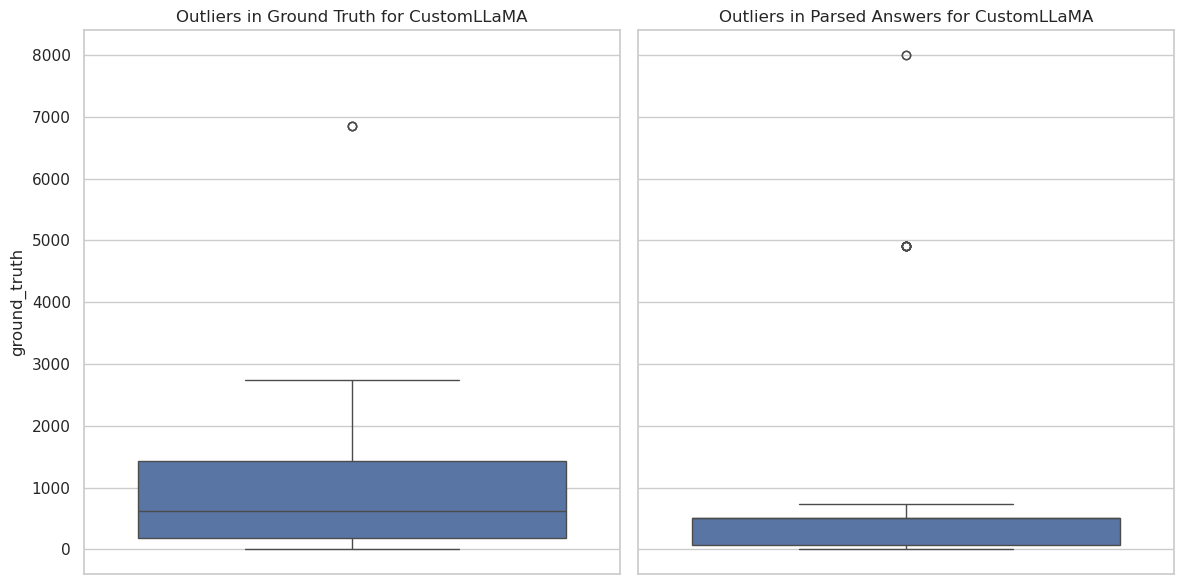

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for only the CustomLLaMA model
df_custom_llama = df_volume[df_volume['model_name'] == 'CustomLLaMA']

# Ensure numeric conversion in case it hasn’t been done yet
df_custom_llama['parsed_answers'] = pd.to_numeric(df_custom_llama['parsed_answers'], errors='coerce')
df_custom_llama['ground_truth'] = pd.to_numeric(df_custom_llama['ground_truth'], errors='coerce')

# Set up the plot style
sns.set(style="whitegrid")

# Create a subplot to compare 'ground_truth' and 'parsed_answers' outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Box plot for 'ground_truth' values for CustomLLaMA
sns.boxplot(y='ground_truth', data=df_custom_llama, ax=axes[0])
axes[0].set_title('Outliers in Ground Truth for CustomLLaMA')

# Box plot for 'parsed_answers' values for CustomLLaMA
sns.boxplot(y='parsed_answers', data=df_custom_llama, ax=axes[1])
axes[1].set_title('Outliers in Parsed Answers for CustomLLaMA')

# Show plot
plt.tight_layout()
plt.show()


In [32]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 303
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          300 non-null    object 
 1   run                 300 non-null    object 
 2   image_path          300 non-null    object 
 3   ground_truth        300 non-null    float64
 4   raw_answers         300 non-null    object 
 5   forced_repetitions  300 non-null    float64
 6   time_ms             300 non-null    float64
 7   parsed_answers      300 non-null    object 
dtypes: float64(3), object(5)
memory usage: 21.1+ KB


### 2. Check dataframe if parsed answers match with raw answers

In [3]:
# Set display options to show all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Set to None to display full cell content

print("Direction dataframe after na value", len(df_direction))

df_direction.head()


Direction dataframe after na value 300


,model_name,run,image_path,ground_truth,raw_answers,forced_repetitions,time_ms,parsed_answers
0,gpt4o,run_0,EXP1-Results/direction/direction_image_1.png,104.0,135,0.0,6023.793697,135.0
1,gpt4o,run_0,EXP1-Results/direction/direction_image_2.png,212.0,45,0.0,5766.133070,45.0
2,gpt4o,run_0,EXP1-Results/direction/direction_image_3.png,215.0,50,0.0,5953.326941,50.0
3,gpt4o,run_0,EXP1-Results/direction/direction_image_4.png,68.0,35,0.0,6007.609367,35.0
4,gpt4o,run_0,EXP1-Results/direction/direction_image_5.png,70.0,40,0.0,6732.647181,40.0


### 3. Validate_parsed_answers = raw_answers

In [4]:
def validate_parsed_answers(df):
    """
    Validate the parsed_answers column by re-applying the extraction logic
    and comparing with parsed_answers.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with raw_answers and parsed_answers
    
    Returns:
    pandas.DataFrame: DataFrame with validation results
    """
    
    def expected_parsed_answer(raw):
        if pd.isna(raw):
            return np.nan
            
        raw = str(raw).strip().replace('\n', '')
        
        # If string starts with "user", extract the last number
        if raw.startswith('user'):
            numbers = re.findall(r'\d+\.?\d*', raw)
            return float(numbers[-1]) if numbers else np.nan
        
        # Extract first number found
        numbers = re.findall(r'\d+\.?\d*', raw)
        return float(numbers[0]) if numbers else np.nan

    # Apply the validation logic to create an expected column
    df['expected_parsed'] = df['raw_answers'].apply(expected_parsed_answer)
    
    # Compare parsed_answers with expected_parsed
    df['is_correct'] = df['parsed_answers'].astype(float) == df['expected_parsed']
    
    # Filter mismatches for easy review
    mismatches = df[df['is_correct'] == False]
    
    # Display mismatches for manual review
    if not mismatches.empty:
        print("Mismatches found:")
        print(mismatches[['raw_answers', 'parsed_answers', 'expected_parsed']])
    else:
        print("All parsed answers match the expected values.")
        
    return mismatches

# Example usage on a DataFrame, e.g., df_direction
mismatches = validate_parsed_answers(df_direction)


All parsed answers match the expected values.


### 4. Display all 9 images tasks

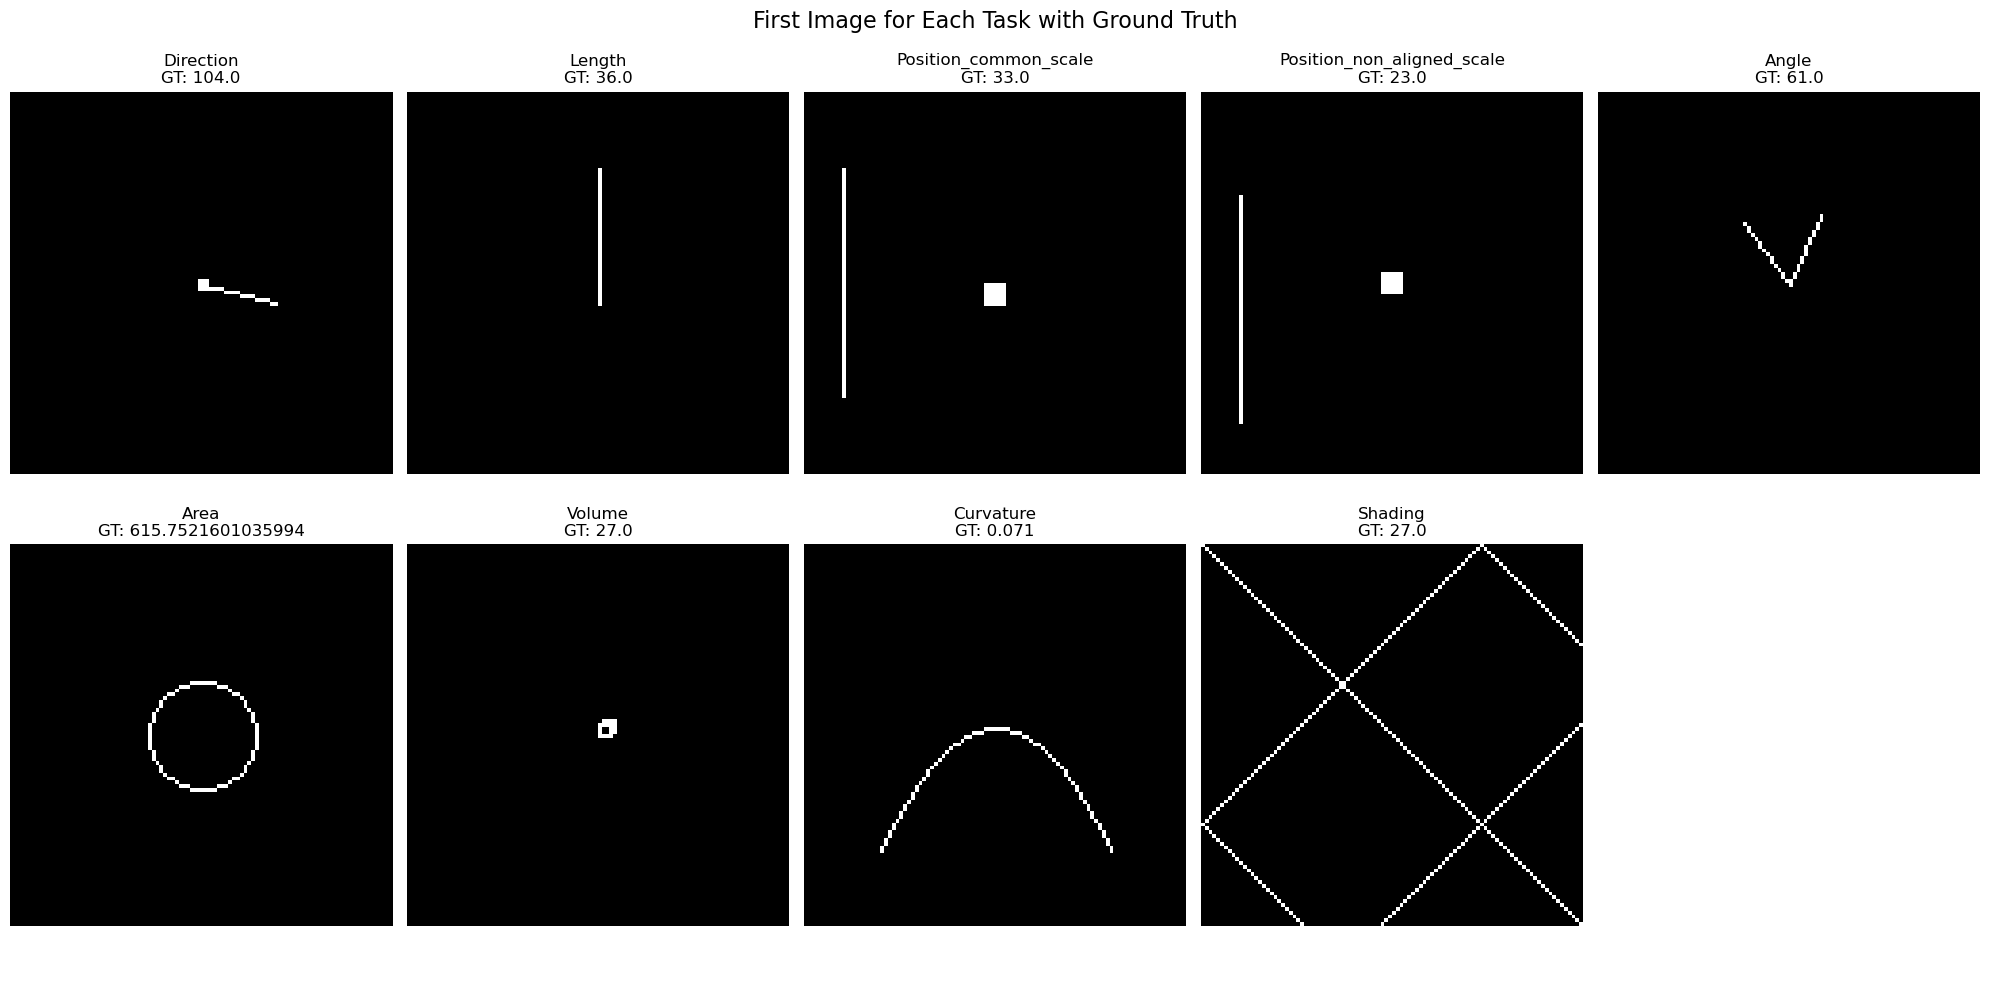

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "." 

# List of CSV files to read
csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv',
    './shading_results.csv'
]

# Number of columns for the plot
num_cols = 5
num_rows = 2

# Create a figure with subplots for displaying images in 2 rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.suptitle("First Image for Each Task with Ground Truth", fontsize=16)

# Flatten axes for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through each CSV file and display the first image for each task
for idx, csv_file in enumerate(csv_files):
    # Check if there is an available axis for this image
    if idx >= num_rows * num_cols:
        break
    
    # Read the CSV file
    if not os.path.exists(csv_file):
        print(f"CSV file not found: {csv_file}")
        continue

    results_df = pd.read_csv(csv_file)

    # Extract the task name from the CSV filename (e.g., 'angle' from 'angle_results.csv')
    task = os.path.basename(csv_file).replace('_results.csv', '')

    # Get the first row to display the first image for this task
    first_row = results_df.iloc[0]
    
    # Extract the filename only from the image path
    image_filename = os.path.basename(first_row["image_path"])  # e.g., 'angle_image_6.png'
    
    # Construct the path with base_folder and the filename
    image_path = os.path.join(base_folder, task, image_filename)  # e.g., './angle/angle_image_6.png'
    ground_truth = first_row["ground_truth"]

    # Display the image in the subplot
    if os.path.exists(image_path):
        img = Image.open(image_path)
        axes[idx].imshow(img, cmap="gray")
        axes[idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
    else:
        print(f"Image not found: {image_path}")
        axes[idx].set_title(f"{task.capitalize()}\nImage not found")
    
    axes[idx].axis("off")

# Hide any remaining empty subplots
for j in range(idx + 1, num_rows * num_cols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


### 5. Caculate all metrics

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats


# Dictionary to store metrics for each dataset
metrics_summary = {}

dataframes = {
    'df_direction': df_direction,
    'df_length': df_length,
    'df_position_common_scale': df_position_common_scale,
    'df_position_non_aligned_scale': df_position_non_aligned_scale,
    'df_angle': df_angle,
    'df_area': df_area,
    'df_volume': df_volume,
    'df_curvature': df_curvature,
    'df_shading': df_shading
}

# Loop through each dataset
for df_name, df in dataframes.items():
    # Dictionary to store metrics for each model within the current DataFrame
    model_metrics = {}
    
    # Group by `model_name` and calculate metrics for each model within the dataset
    for model_name, data in df.groupby('model_name'):
        # Ensure `ground_truth` and `parsed_answers` columns are numeric, converting non-numeric values to NaN
        data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
        data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
        
        # Drop rows where either `ground_truth` or `parsed_answers` is NaN after conversion
        data = data.dropna(subset=['ground_truth', 'parsed_answers'])
        
        # Calculate Mean and Standard Deviation of `parsed_answers`
        mean_parsed_answers = data['parsed_answers'].mean()
        std_parsed_answers = data['parsed_answers'].std()
        
        # Calculate Mean Squared Error (MSE)
        data['mse'] = (data['ground_truth'] - data['parsed_answers']) ** 2
        avg_mse = data['mse'].mean()
        
        # Calculate Mean Log Absolute Error (MLAE)
        data['mlae'] = data.apply(
            lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
            axis=1
        )
        
        # Calculate average MLAE and standard deviation of MLAE
        avg_mlae = data['mlae'].mean()
        std_mlae = data['mlae'].std()
        
        # Bootstrap confidence interval for MLAE
        mlae_values = data['mlae'].dropna().values  # Drop NaN values, if any
        bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
        confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval margin for std (using 1.96 Z-score)

        # Store metrics in the model_metrics dictionary
        model_metrics[model_name] = {
            'Dataset': df_name,
            'Model': model_name,
            #'Mean Parsed Answers': round(mean_parsed_answers, 2),
            #'Std Parsed Answers': round(std_parsed_answers, 2),
            #'Average MSE': round(avg_mse, 2),
            'Average MLAE': round(avg_mlae, 2),
            'Std MLAE': round(std_mlae, 2),
            'Confidence Interval (95%)': round(confidence_value, 2)
        }
    
    # Store model metrics for the current dataset
    metrics_summary[df_name] = model_metrics

# Convert the nested metrics_summary dictionary to a DataFrame for easy viewing
metrics_table = pd.DataFrame([
    metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
])

# Display the resulting table
metrics_table


NameError: name 'df_direction' is not defined

### 6. Plot MLAE for all models


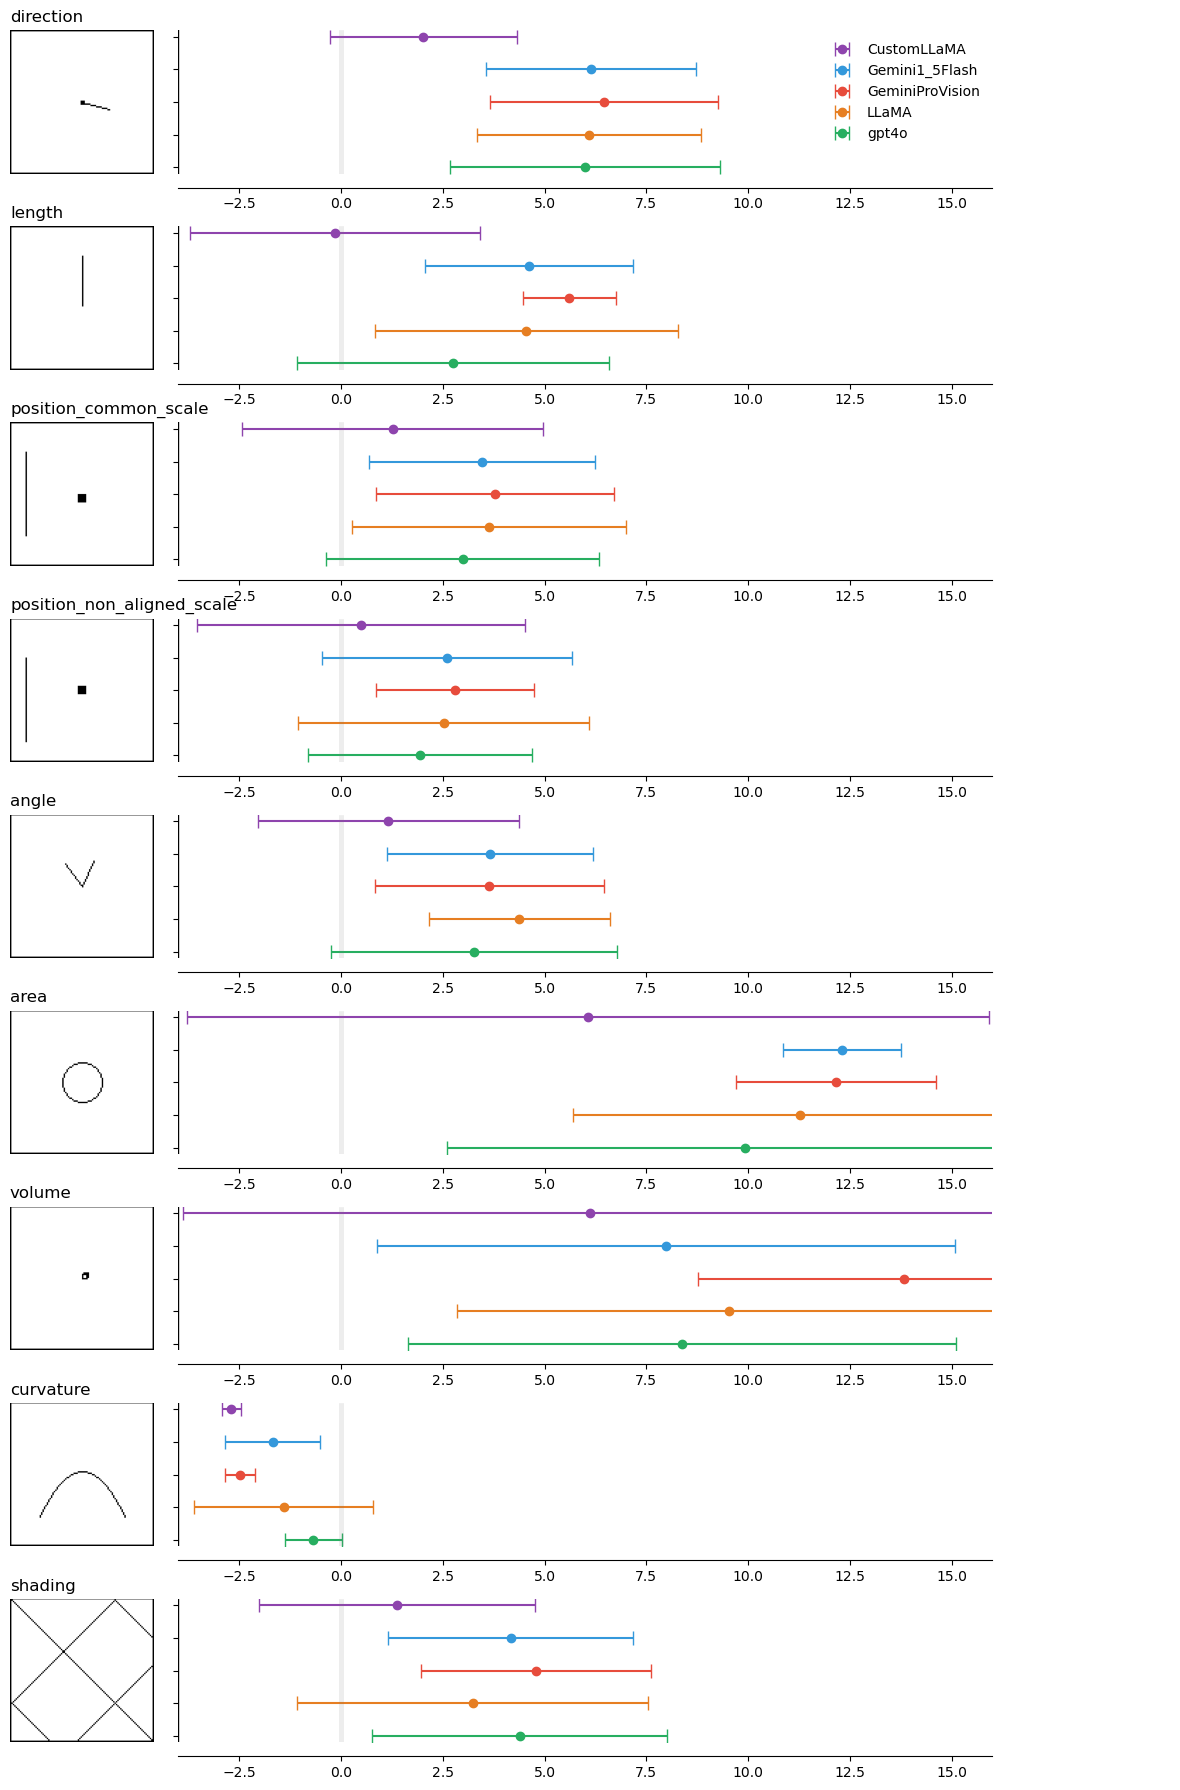

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

import os

# Group data by dataset for easier access
summary_stats_by_task = {df_name: metrics_table[metrics_table['Dataset'] == df_name] for df_name in metrics_table['Dataset'].unique()}

# Set the base directory
base_dir = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXP1-Results-5000'

# Define task images relative to the base directory
task_images = {
    'direction': os.path.join(base_dir, 'direction', 'direction_image_1.png'),
    'length': os.path.join(base_dir, 'length', 'length_image_1.png'),
    'position_common_scale': os.path.join(base_dir, 'position_common_scale', 'position_common_scale_image_1.png'),
    'position_non_aligned_scale': os.path.join(base_dir, 'position_non_aligned_scale', 'position_non_aligned_scale_image_1.png'),
    'angle': os.path.join(base_dir, 'angle', 'angle_image_1.png'),
    'area': os.path.join(base_dir, 'area', 'area_image_1.png'),
    'volume': os.path.join(base_dir, 'volume', 'volume_image_1.png'),
    'curvature': os.path.join(base_dir, 'curvature', 'curvature_image_1.png'),
    'shading': os.path.join(base_dir, 'shading', 'shading_image_1.png')
}

# Check if each path exists and print
#for task, img_path in task_images.items():
    #print(f"Path for {task}: {img_path} - Exists: {os.path.isfile(img_path)}")


# Define colors for each model
model_colors = {
    'CustomLLaMA': '#8E44AD',       # Purple
    'Gemini1_5Flash': '#3498DB',    # Blue
    'GeminiProVision': '#E74C3C',   # Red
    'LLaMA': '#E67E22',             # Orange
    'gpt4o': '#27AE60'              # Green
}

# Plot configuration
num_tasks = len(summary_stats_by_task)
fig, axes = plt.subplots(num_tasks, 3, figsize=(12, 2 * num_tasks), 
                         gridspec_kw={'width_ratios': [1, 5, 1]}, sharex=False)
fig.subplots_adjust(hspace=0.5, wspace=0.3, left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Convert `axes` to 2D array if only one row of subplots
if num_tasks == 1:
    axes = axes.reshape(1, -1)

# Loop through each task (dataset) and its summary stats
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Clean task name to match keys in `task_images`
    cleaned_task_name = task_name.replace("df_", "")
    
    # Use the cleaned name to access the correct image path
    img_path = task_images.get(cleaned_task_name)
    
    # Display task image if available
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')  # Hide axes for the image plot

        except Exception as e:
            #print(f"Error displaying image for {task_name}: {e}")
            ax_img.text(0.5, 0.5, "Error displaying image", ha="center", va="center", fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        #print(f"Image not found: {img_path}")
        ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=10, color="black")
        ax_img.set_facecolor("white")

    # Sort model names alphabetically and get y positions
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names))

    # Plot MLAE and error bars in the middle
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]

        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', 
                         color=model_colors.get(model_name, 'gray'), capsize=5, 
                         label=f"{model_name}" if i == 0 else None)

    # Add reference lines
    ax_plot.axvline(-4, color="black", linewidth=1)
    ax_plot.axvline(-14, color="black", linewidth=1)
    
    # Add blurred line at 0
    for offset in np.linspace(-0.05, 0.05, 10):
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)

    # Customize plot appearance

    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['bottom'].set_position(('outward', 10))

    # Set axis properties
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])
    ax_plot.set_xlim(-4, 16)
    ax_plot.invert_yaxis()

    # Clean task name and set title
    cleaned_task_name = task_name.replace("df_", "")
    ax_img.set_title(cleaned_task_name, loc="left", fontsize=12, color="black")

    # Configure right labels
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels(sorted_model_names, fontsize=10)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_label.set_ylim(ax_plot.get_ylim())
    ax_label.axis("off")

# Add legend to the first row
axes[0, 1].legend(loc="best", frameon=False)

# Ensure tight layout
plt.tight_layout()
plt.show()


### 7. Filter and sort model data and caculate for each model

In [8]:
def filter_and_sort_df(df, model_name="all"):
    """
    Filter and sort the df DataFrame by model name, removing '.0' for integer values.
    
    Parameters:
    - df: pandas.DataFrame, the DataFrame to filter and sort
    - model_name: str, specific model name to filter or "all" for all models
    
    Returns:
    - pandas.DataFrame: The filtered and sorted DataFrame without styling
    """
    # Filter by model name or select all
    if model_name != "all":
        filtered_df = df[df['model_name'] == model_name]
    else:
        filtered_df = df

    # Sort by 'ground_truth' and 'parsed_answers'
    filtered_sorted_df = filtered_df.sort_values(by=['ground_truth', 'parsed_answers'])
    
    # Convert 'ground_truth' and 'parsed_answers' to integer if they are whole numbers
    filtered_sorted_df['ground_truth'] = filtered_sorted_df['ground_truth'].apply(
        lambda x: int(float(x)) if float(x).is_integer() else float(x)
    )
    filtered_sorted_df['parsed_answers'] = filtered_sorted_df['parsed_answers'].apply(
        lambda x: int(float(x)) if float(x).is_integer() else float(x)
    )

    return filtered_sorted_df[['ground_truth', 'parsed_answers', 'model_name']]



### 8. Display 20 images for each task

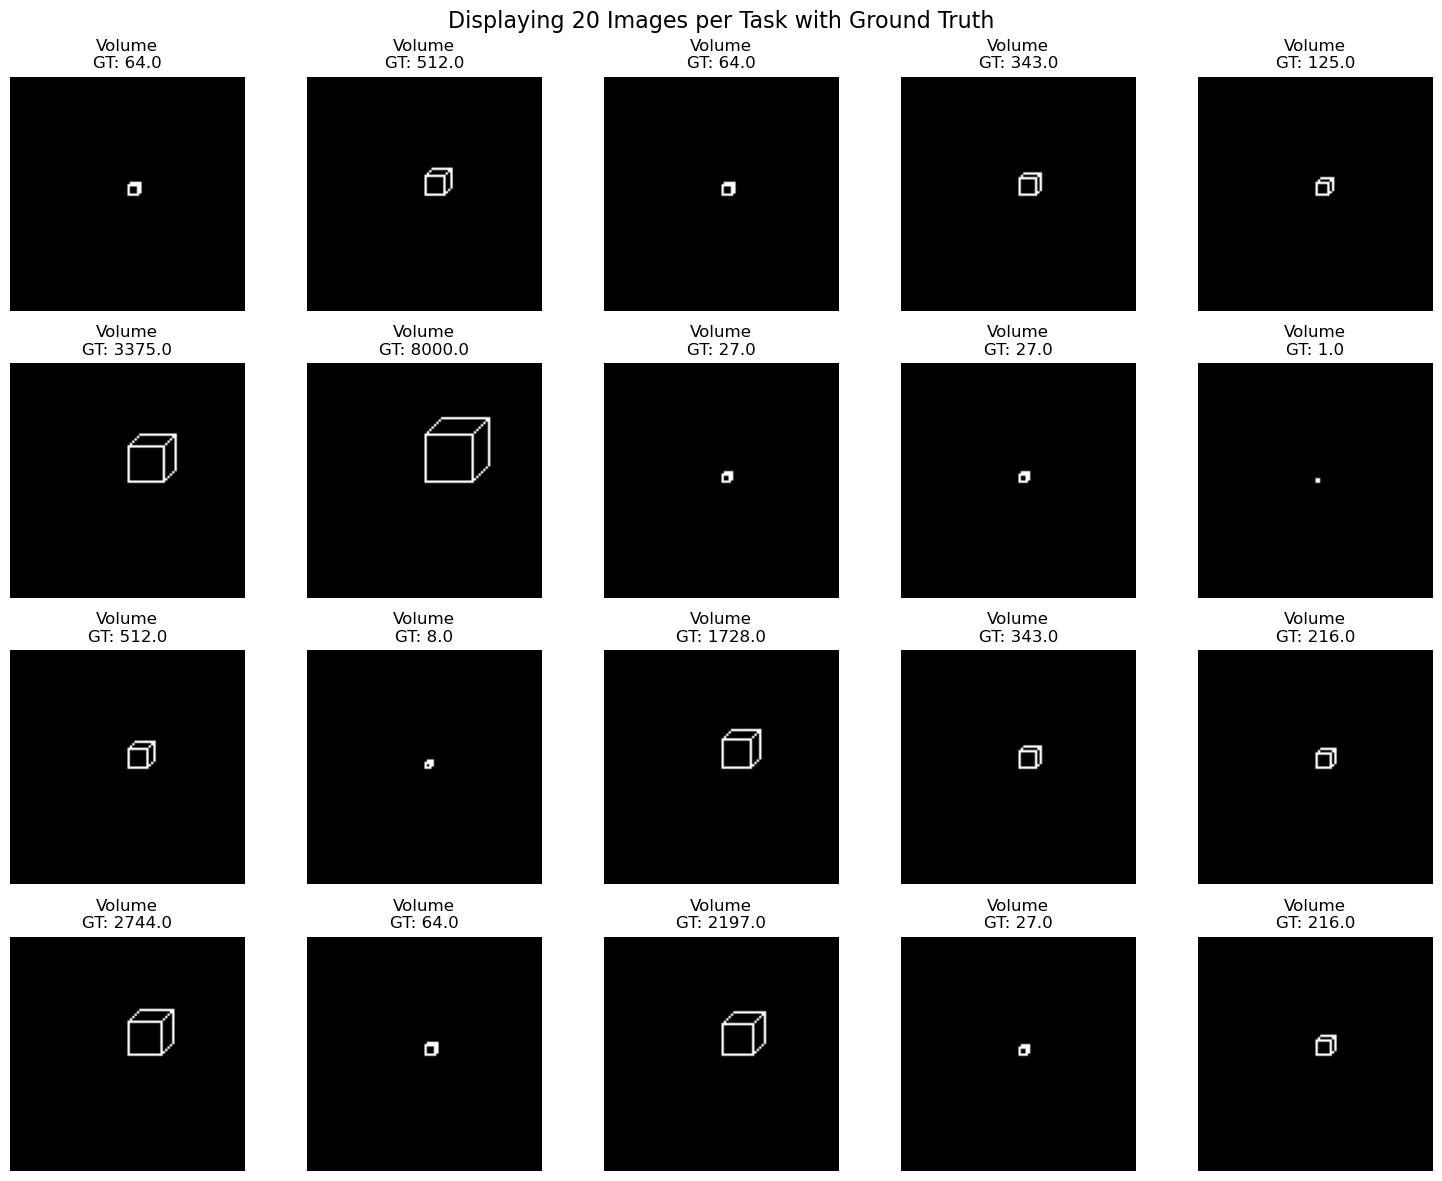

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "."

# Task selection for quick customization
# Define the number of images per task to display and specify the tasks to show
num_images = 20  # Number of images to display per task
tasks = ["volume"]  # Example: choose specific tasks or set to "all" for all tasks

csv_files = {
    'direction': './direction_results.csv', 
    'length': './length_results.csv', 
    'position_common_scale': './position_common_scale_results.csv', 
    'position_non_aligned_scale': './position_non_aligned_scale_results.csv',
    'angle': './angle_results.csv',
    'area': './area_results.csv',
    'volume': './volume_results.csv',
    'curvature': './curvature_results.csv',
    'shading': './shading_results.csv'
}
def display_images(num_images, tasks="all"):
    # Use all tasks if 'tasks' parameter is "all"
    selected_tasks = list(csv_files.keys()) if tasks == "all" else tasks

    # Calculate total number of subplots needed
    total_images = len(selected_tasks) * num_images
    num_cols = 5
    num_rows = (total_images + num_cols - 1) // num_cols  # Automatically adjust rows

    # Create figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    fig.suptitle(f"Displaying {num_images} Images per Task with Ground Truth", fontsize=16)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    plot_idx = 0  # To keep track of the current subplot index
    for task in selected_tasks:
        # Check if the CSV file exists for the task
        csv_file = csv_files.get(task)
        if not os.path.exists(csv_file):
            print(f"CSV file not found: {csv_file}")
            continue

        # Load CSV data
        results_df = pd.read_csv(csv_file)

        # Limit to num_images or the number of rows in the CSV, whichever is smaller
        num_to_display = min(num_images, len(results_df))

        # Loop to display each image for the task
        for i in range(num_to_display):
            if plot_idx >= num_rows * num_cols:
                break
            
            # Get the row data and image path
            row = results_df.iloc[i]
            image_filename = os.path.basename(row["image_path"])
            image_path = os.path.join(base_folder, task, image_filename)
            ground_truth = row["ground_truth"]

            # Display image if exists, else show 'Image not found'
            if os.path.exists(image_path):
                img = Image.open(image_path)
                axes[plot_idx].imshow(img, cmap="gray")
                axes[plot_idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
            else:
                print(f"Image not found: {image_path}")
                axes[plot_idx].set_title(f"{task.capitalize()}\nImage not found")

            axes[plot_idx].axis("off")
            plot_idx += 1

    # Hide any remaining empty subplots
    for j in range(plot_idx, num_rows * num_cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Call the function with the specified number of images and tasks
display_images(num_images, tasks)


In [ ]:
df_volume

# Set display options to show all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Set to None to display full cell content
df_volume

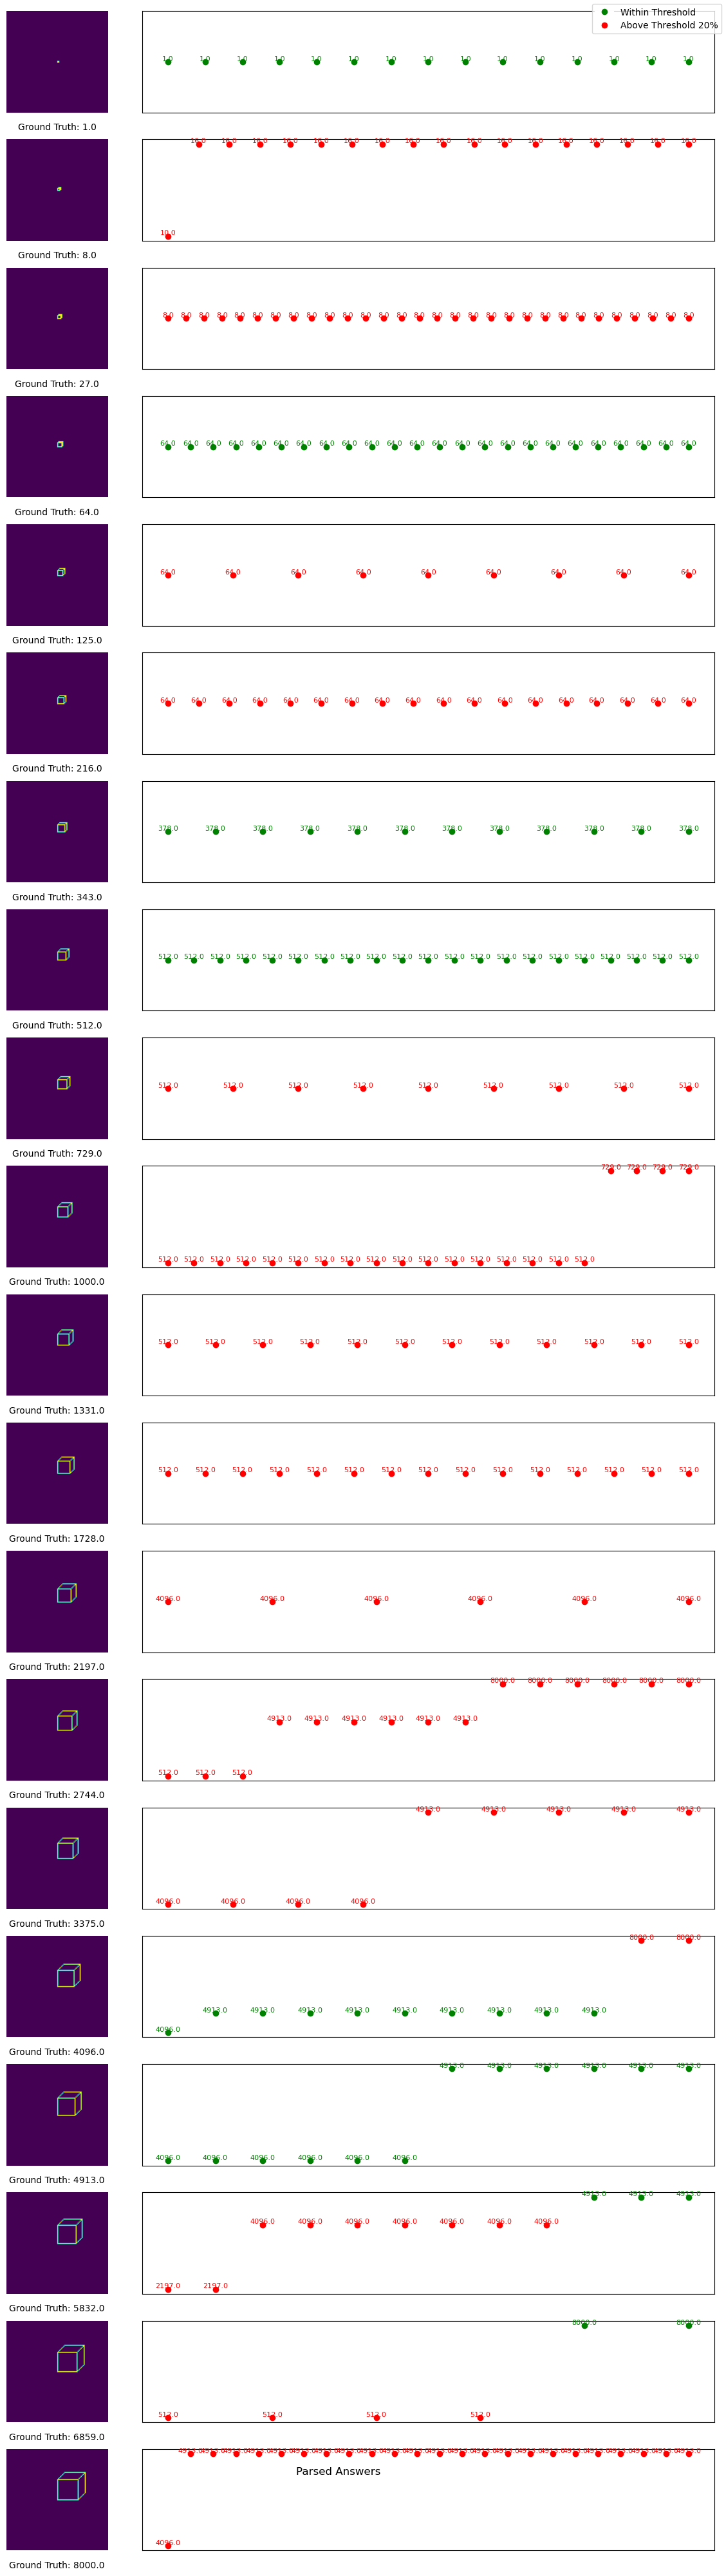

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.lines import Line2D

# Define the parameters
# Set your dataset and base folder path here
dataset = df_volume  # Change this to df_volume or any other DataFrame you want to process
base_folder = "./volume/" 

def filter_sort_and_group_df(df, base_folder=''):
    """
    Sorts and groups a DataFrame by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - base_folder (str): The base folder path to prepend to image paths.

    Returns:
    - pd.DataFrame: A sorted and grouped DataFrame with full image paths.
    """
    # Ensure numeric conversion for sorting, if necessary
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed_answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x)) if pd.notna(x) else None
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization
threshold_percentage = 0.2  # 20% deviation threshold
fig, axes = plt.subplots(len(unique_ground_truth_df), 2, figsize=(12, len(unique_ground_truth_df) * 2), 
                         gridspec_kw={'width_ratios': [1, 3]})

# Loop over each unique ground_truth and plot its parsed_answers as points on a scatter plot
for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    # Get the full path for each image
    image_path = row['image_path']
    if image_path and os.path.exists(image_path):
        # Load and display the image on the left
        img = Image.open(image_path)
        ax_img = axes[i, 0]
        ax_img.imshow(img)
        ax_img.axis('off')  # Turn off the axis for the image
        
        # Add ground_truth label under the image
        ax_img.text(0.5, -0.1, f"Ground Truth: {row['ground_truth']}", 
                    ha='center', va='top', transform=ax_img.transAxes, fontsize=10)

    # Right side: Plot parsed_answers as a scatter plot
    ax_scatter = axes[i, 1]
    y_values = row['parsed_answers']
    x_values = list(range(1, len(y_values) + 1))  # Use indices (1, 2, 3, ...) as x-axis for each parsed answer

    # Plot points as circles with conditional coloring based on deviation
    for x, y in zip(x_values, y_values):
        # Calculate the percentage deviation from the ground truth
        deviation = abs(y - row['ground_truth']) / row['ground_truth']
        
        # Set color based on whether the deviation is greater than the threshold
        color = 'red' if deviation > threshold_percentage else 'green'
        
        # Plot the point with the chosen color
        ax_scatter.plot(x, y, 'o', color=color)
        # Add value label above each point
        ax_scatter.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color=color)

    # Remove grid and ticks for each scatter plot
    ax_scatter.grid(False)
    ax_scatter.set_yticks([])
    ax_scatter.set_xticks([])

# Add a legend manually with custom labels
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Within Threshold'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Above Threshold 20%')
]

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add a single label "Parsed Answers" in the center of the figure
fig.text(0.5, 0.04, 'Parsed Answers', ha='center', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()



### Check DF_Area

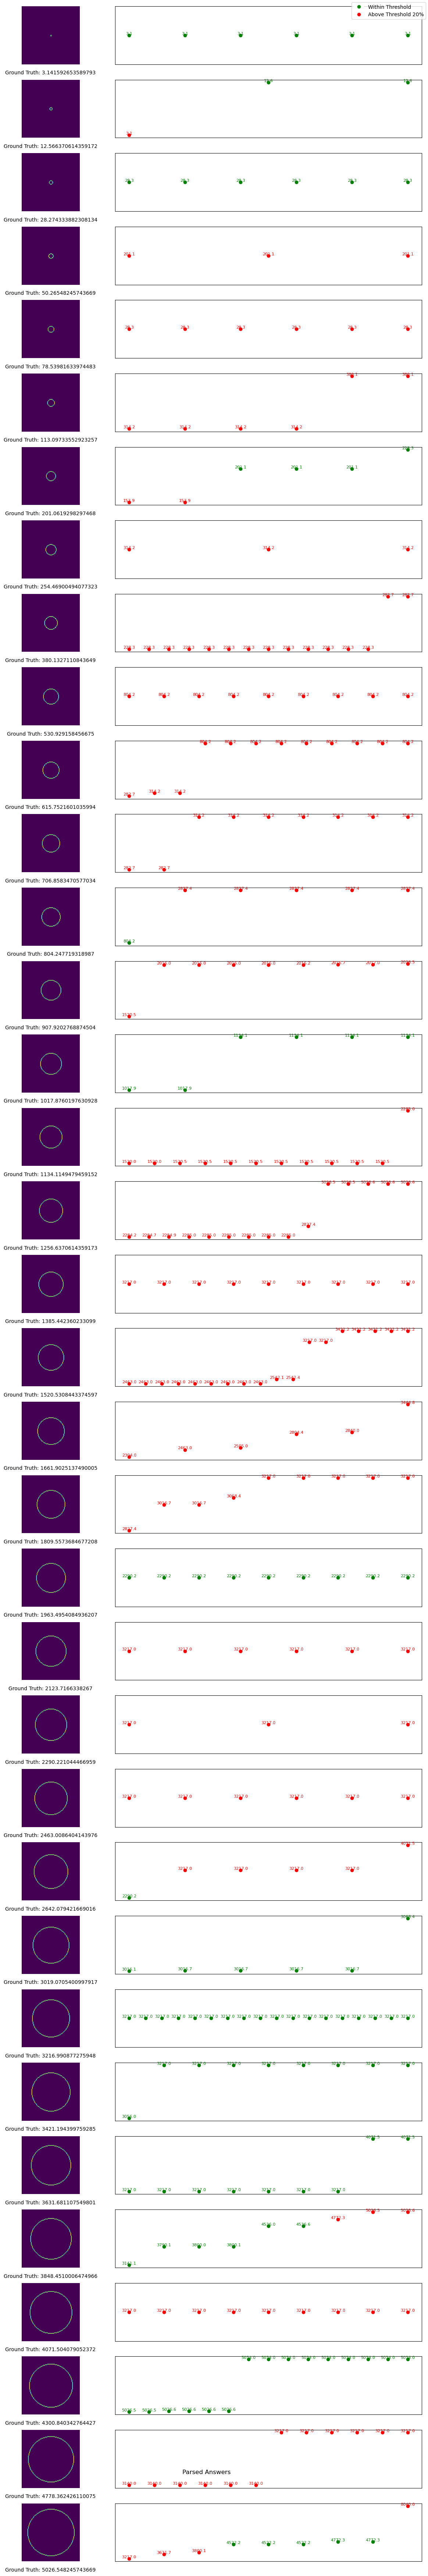

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.lines import Line2D

# Define the parameters
# Set your dataset and base folder path here
dataset = df_area  # Change this to df_area or any other DataFrame you want to process
base_folder = "./area/" 

def filter_sort_and_group_df(df, base_folder=''):
    """
    Sorts and groups a DataFrame by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - base_folder (str): The base folder path to prepend to image paths.

    Returns:
    - pd.DataFrame: A sorted and grouped DataFrame with full image paths.
    """
    # Ensure numeric conversion for sorting, if necessary
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed_answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x)) if pd.notna(x) else None
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization
threshold_percentage = 0.2  # 20% deviation threshold
fig, axes = plt.subplots(len(unique_ground_truth_df), 2, figsize=(12, len(unique_ground_truth_df) * 2), 
                         gridspec_kw={'width_ratios': [1, 3]})

# Loop over each unique ground_truth and plot its parsed_answers as points on a scatter plot
for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    image_path = row['image_path']
    if image_path and os.path.exists(image_path):
        img = Image.open(image_path)
        ax_img = axes[i, 0]
        ax_img.imshow(img)
        ax_img.axis('off')
        
        # Add ground_truth label under the image
        ax_img.text(0.5, -0.1, f"Ground Truth: {row['ground_truth']}", 
                    ha='center', va='top', transform=ax_img.transAxes, fontsize=10)

    ax_scatter = axes[i, 1]
    y_values = row['parsed_answers']
    x_values = list(range(1, len(y_values) + 1))

    # Plot each point with a conditional color
    for x, y in zip(x_values, y_values):
        # Calculate percentage deviation from ground truth
        deviation = abs(y - row['ground_truth']) / row['ground_truth']
        
        # Choose color based on deviation
        color = 'red' if deviation > threshold_percentage else 'green'
        
        # Plot the point with the chosen color
        ax_scatter.plot(x, y, 'o', color=color)
        ax_scatter.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color=color)

    ax_scatter.grid(False)
    ax_scatter.set_yticks([])
    ax_scatter.set_xticks([])

# Add a legend manually with custom labels
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Within Threshold'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Above Threshold 20%')
]

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add a single label "Parsed Answers" in the center of the figure
fig.text(0.5, 0.04, 'Parsed Answers', ha='center', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# Dictionary to store the calculated metrics for `df_area` and `df_volume`
metrics_summary = {}

# Dictionary containing only `df_area` and `df_volume`
dataframes = {
    'df_area': df_area,
    'df_volume': df_volume
}

# Loop through each DataFrame in the `dataframes` dictionary
for df_name, df in dataframes.items():
    print(f"\nCalculating metrics for dataset: {df_name}")
    model_metrics = {}
    
    # Group by `model_name` and calculate metrics for each model within the dataset
    for model_name, data in df.groupby('model_name'):
        print(f"\nModel: {model_name}")
        
        # Ensure `ground_truth` and `parsed_answers` are numeric, converting non-numeric values to NaN
        data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
        data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
        
        # Drop rows with NaN values in `ground_truth` or `parsed_answers`
        data = data.dropna(subset=['ground_truth', 'parsed_answers'])
        
        # Show the cleaned data for verification
        print(f"Cleaned data:\n{data[['ground_truth', 'parsed_answers']].head()}")

        # Calculate Mean and Standard Deviation of `parsed_answers`
        mean_parsed_answers = data['parsed_answers'].mean()
        std_parsed_answers = data['parsed_answers'].std()
        print(f"Mean Parsed Answers: {mean_parsed_answers}")
        print(f"Std Parsed Answers: {std_parsed_answers}")
        
        # Calculate Mean Squared Error (MSE)
        mse = ((data['ground_truth'] - data['parsed_answers']) ** 2).mean()
        print(f"Mean Squared Error (MSE): {mse}")
        
        # Calculate Mean Log Absolute Error (MLAE)
        data['mlae'] = data.apply(
            lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
            axis=1
        )
        
        # Show MLAE values for individual rows
        print(f"MLAE values for each row:\n{data['mlae'].head()}")
        
        # Calculate average MLAE and standard deviation of MLAE
        avg_mlae = data['mlae'].mean()
        std_mlae = data['mlae'].std()
        print(f"Average MLAE: {avg_mlae}")
        print(f"Std MLAE: {std_mlae}")
        
        # Bootstrap confidence interval for MLAE
        mlae_values = data['mlae'].dropna().values  # Drop NaN values, if any
        bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
        confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval margin
        print(f"Bootstrap Std MLAE (95% CI margin): {confidence_value}")
        
        # Store metrics for the current model
        model_metrics[model_name] = {
            'Dataset': df_name,
            'Model': model_name,
            'Mean Parsed Answers': round(mean_parsed_answers, 2),
            'Std Parsed Answers': round(std_parsed_answers, 2),
            'Average MSE': round(mse, 2),
            'Average MLAE': round(avg_mlae, 2),
            'Std MLAE': round(std_mlae, 2),
            'Confidence Interval (95%)': round(confidence_value, 2)
        }
    
    # Add metrics for each model within the current dataset
    metrics_summary[df_name] = model_metrics

# Convert the metrics_summary dictionary to a DataFrame for easy viewing
metrics_table = pd.DataFrame([
    metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
])

# Display the resulting table with all calculated metrics
print("\nSummary Metrics Table:")
metrics_table




Calculating metrics for dataset: df_area

Model: CustomLLaMA
Cleaned data:
   ground_truth  parsed_answers
0   1520.530844          2463.0
1   1134.114948          1520.5
2    380.132711           228.3
3    113.097336           380.1
4   3631.681108          3217.0
Mean Parsed Answers: 2346.6626666666666
Std Parsed Answers: 1536.6186488671726
Mean Squared Error (MSE): 980409.0409306077
MLAE values for each row:
0    9.880493
1    8.594362
2    7.247526
3    8.061386
4    8.696293
Name: mlae, dtype: float64
Average MLAE: 7.388104501885273
Std MLAE: 4.239308616155588
Bootstrap Std MLAE (95% CI margin): 8.295184919904658

Calculating metrics for dataset: df_volume

Model: CustomLLaMA
Cleaned data:
   ground_truth  parsed_answers
0          64.0            64.0
1         512.0           512.0
2          64.0            64.0
3         343.0           378.0
4         125.0            64.0
Mean Parsed Answers: 1649.9833333333333
Std Parsed Answers: 2264.15534238201
Mean Squared Error (MSE):

,Dataset,Model,Mean Parsed Answers,Std Parsed Answers,Average MSE,Average MLAE,Std MLAE,Confidence Interval (95%)
0,df_area,CustomLLaMA,2346.66,1536.62,980409.04,7.39,4.24,8.30
1,df_volume,CustomLLaMA,1649.98,2264.16,2562180.95,5.75,5.37,10.51
